<a href="https://colab.research.google.com/github/mustafiz-ahsan/Image-Processing-CSE428-/blob/main/A2_22101485_22101486.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

Max collaborators = 2

Hand holding is low for this assignment. Adjust accordingly. In case of confusion, feel free to reach out to your lab faculties. Good luck.

In [ ]:
COLLABORATORS_NAME = "Prachurja Bhattacharjee, Mustafis Ahsan"
COLLABORATORS_ID = "22101485, 22101486"

#Loading dependencies

In [ ]:
import numpy as np
from tensorflow import keras
import sklearn
import matplotlib.pyplot as plt
#add if more dependencies are required here

#Loading dataset

In [ ]:
id =  22101486

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, y_train = sklearn.utils.resample(x_train, y_train, replace = False, n_samples = 5000, random_state = id, stratify = y_train)
x_test, y_test = sklearn.utils.resample(x_test, y_test, replace = False, n_samples = 1000, random_state = id, stratify = y_train)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


#Task 1: Training a logistic regressor [10 Marks]

In [ ]:
print(x_train.shape)
print(y_train.shape)

(5000, 32, 32, 3)
(5000, 1)


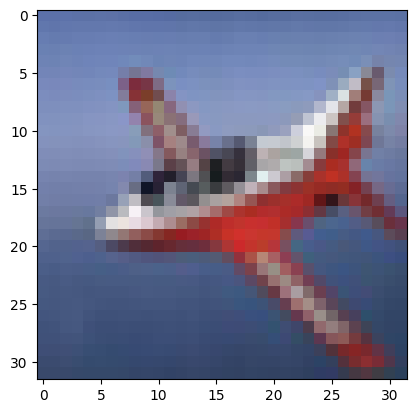

In [ ]:
plt.imshow(x_train[4999])

###1. Convert the images to grayscale

In [ ]:
x_train = np.dot(x_train[...,:3], [0.2989, 0.5870, 0.1140])
x_test = np.dot(x_test[...,:3], [0.2989, 0.5870, 0.1140])

### 2. Prepare the grayscale images for logistic regressor (reshape and normalize)

Use z-score normalization.

In [ ]:
# Reshape grayscale images
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Calculate mean and standard deviation from the training data
mean = x_train_reshaped.mean()
std = x_train_reshaped.std()

# Apply z-score normalization
x_train_normalized = (x_train_reshaped - mean) / std
x_test_normalized = (x_test_reshaped - mean) / std

print("Shape of reshaped and normalized training images:", x_train_normalized.shape)
print("Shape of reshaped and normalized testing images:", x_test_normalized.shape)

Shape of reshaped and normalized training images: (5000, 1024)
Shape of reshaped and normalized testing images: (1000, 1024)


###3. Create a validation set (20%)

In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into train (80%) and validation (20%)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_normalized,
    y_train,
    test_size=0.2,
    random_state=id,
    stratify=y_train
)

print("Shape of final training set:", x_train_final.shape)
print("Shape of validation set:", x_val.shape)
print("Shape of final training labels:", y_train_final.shape)
print("Shape of validation labels:", y_val.shape)

Shape of final training set: (4000, 1024)
Shape of validation set: (1000, 1024)
Shape of final training labels: (4000, 1)
Shape of validation labels: (1000, 1)


###4. Compute class weights

Go through this link - https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_final),
    y=y_train_final.flatten()
)

# Convert to dictionary format for Keras
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights)
print("Class weight dictionary:", class_weight_dict)

Class weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Class weight dictionary: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0), 5: np.float64(1.0), 6: np.float64(1.0), 7: np.float64(1.0), 8: np.float64(1.0), 9: np.float64(1.0)}


###5. Run the logistic regressor

Use L2 regularizer. Find the C hyperparameter value through grid search. Pick the testing values according to your understanding. Use at least 3 test values and at max 5. Use the computed class weights while training your model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define C hyperparameter values for grid search
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Create Logistic Regression model with L2 regularization
log_reg = LogisticRegression(
    penalty='l2',
    max_iter=1000,
    random_state=id,
    class_weight=class_weight_dict,
    solver='lbfgs'
)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search on training data
print("Starting grid search...")
grid_search.fit(x_train_final, y_train_final.ravel())

# Get the best hyperparameter
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"\nBest C value: {best_C}")
print(f"Best cross-validation accuracy: {best_score:.4f}")
best_model = grid_search.best_estimator_

# Make predictions
y_train_predict = best_model.predict(x_train_final)
y_val_predict = best_model.predict(x_val)
y_test_predict = best_model.predict(x_test_normalized)

# Calculate accuracies
acc_training = np.mean(y_train_final.flatten() == y_train_predict) * 100
acc_validation = np.mean(y_val.flatten() == y_val_predict) * 100
acc_testing = np.mean(y_test.flatten() == y_test_predict) * 100

print(f"Training accuracy (%) = {acc_training:.2f}")
print(f"Validation accuracy (%) = {acc_validation:.2f}")
print(f"Testing accuracy (%) = {acc_testing:.2f}")
print(f"Best C value used: {best_C}")

Starting grid search...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best C value: 0.01
Best cross-validation accuracy: 0.2582
Training accuracy (%) = 49.23
Validation accuracy (%) = 26.30
Testing accuracy (%) = 27.20
Best C value used: 0.01


###6. Evaluate the logistic regressor on the test set

LOGISTIC REGRESSION EVALUATION RESULTS

Best Hyperparameter: C = 0.01

Training Accuracy:   49.23%
Validation Accuracy: 26.30%
Testing Accuracy:    27.20%

--- Test Set Metrics ---
Accuracy:  0.2720
Precision: 0.2693
Recall:    0.2705
F1-Score:  0.2696

Confusion Matrix (Test Set):
[[34  6 14  3  3  8  9 13 17 13]
 [ 7 33  2  3  3  5  9  6  9 23]
 [15  2 29  7 12  9 13  6  4  2]
 [ 9  4  5 23  7 16 13  8  5  6]
 [11  2 14  7 16 17 12 10  3  4]
 [10  6 12 12 10 29  8  6  8  2]
 [ 8 10  8 13 11  5 19  4  6  6]
 [ 4  6  9  9 13 10  7 25  8  6]
 [13 12  5  8  5  4  2  4 29 10]
 [ 6 23  4 10  1  2  4  7 15 35]]


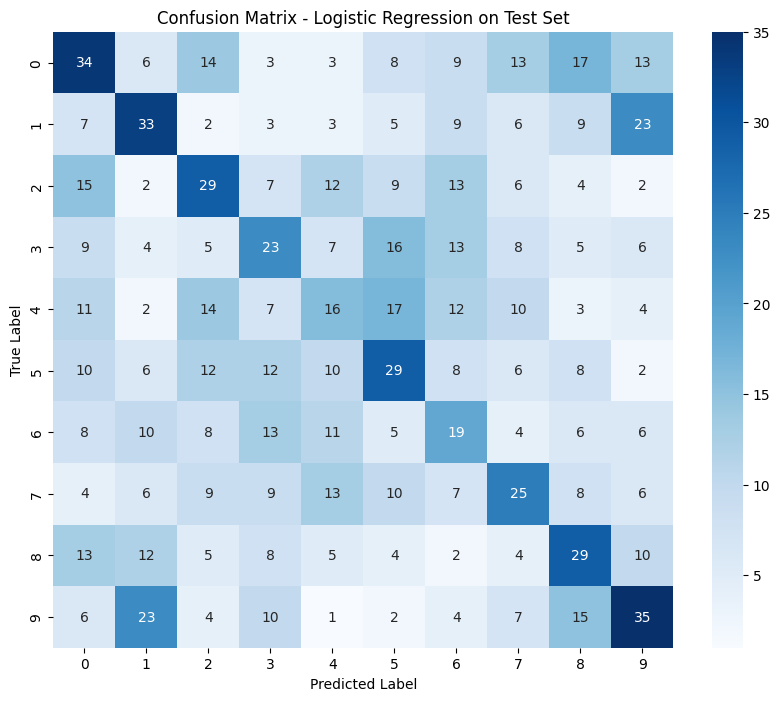


Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

     Class 0       0.29      0.28      0.29       120
     Class 1       0.32      0.33      0.32       100
     Class 2       0.28      0.29      0.29        99
     Class 3       0.24      0.24      0.24        96
     Class 4       0.20      0.17      0.18        96
     Class 5       0.28      0.28      0.28       103
     Class 6       0.20      0.21      0.20        90
     Class 7       0.28      0.26      0.27        97
     Class 8       0.28      0.32      0.30        92
     Class 9       0.33      0.33      0.33       107

    accuracy                           0.27      1000
   macro avg       0.27      0.27      0.27      1000
weighted avg       0.27      0.27      0.27      1000



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Make predictions on all sets
y_train_pred = best_model.predict(x_train_final)
y_val_pred = best_model.predict(x_val)
y_test_pred = best_model.predict(x_test_normalized)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Print evaluation results
print("="*60)
print("LOGISTIC REGRESSION EVALUATION RESULTS")
print("="*60)
print(f"\nBest Hyperparameter: C = {best_C}")
print(f"\nTraining Accuracy:   {accuracy_score(y_train_final, y_train_pred)*100:.2f}%")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)*100:.2f}%")
print(f"Testing Accuracy:    {test_accuracy*100:.2f}%")

print(f"\n--- Test Set Metrics ---")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

# Confusion matrix
print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Logistic Regression on Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("\nDetailed Classification Report (Test Set):")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred,
                          target_names=[f'Class {i}' for i in range(10)]))

###7. Write code to pick up a random image from the test set and display it

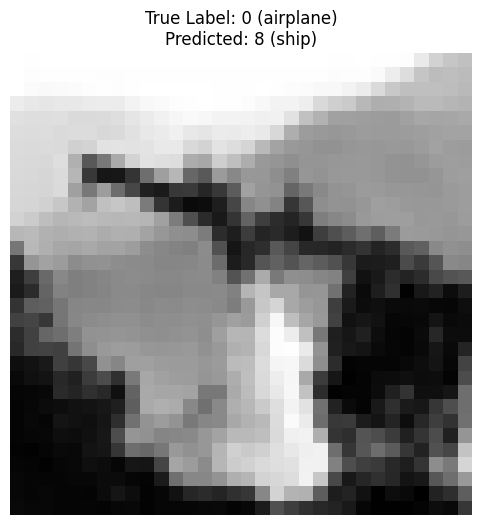

In [ ]:
import random

# Pick a random index from test set
random_idx = random.randint(0, len(x_test) - 1)

# Get the image and label
random_image = x_test[random_idx]  # Grayscale image (32x32)
true_label = y_test[random_idx][0]

# Get prediction from the model
random_image_normalized = x_test_normalized[random_idx].reshape(1, -1)
predicted_label = best_model.predict(random_image_normalized)[0]

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(random_image, cmap='gray')
plt.title(f'True Label: {true_label} ({class_names[true_label]})\n' +
          f'Predicted: {predicted_label} ({class_names[predicted_label]})',
          fontsize=12)
plt.axis('off')
plt.show()

###8. Print the predicted class vs the original class

Do not print out the numerical class. Map it from here - https://keras.io/2/api/datasets/cifar10/

In [ ]:
# CIFAR-10 class names (from keras documentation)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print predicted class vs original class
print("="*50)
print("PREDICTION COMPARISON")
print("="*50)
print(f"Original Class:  {class_names[true_label]}")
print(f"Predicted Class: {class_names[predicted_label]}")
print("="*50)

if true_label == predicted_label:
    print("✓ Prediction is CORRECT!")
else:
    print("✗ Prediction is INCORRECT!")

PREDICTION COMPARISON
Original Class:  airplane
Predicted Class: ship
✗ Prediction is INCORRECT!


#Task 2: Training a convolutional neural network [20 Marks]

We will not strictly control how you implement this code. You can use either Tensorflow or PyTorch. However the structure of the network must be -

```
Input -> Conv1 -> Conv2 -> Conv3 -> Fully Connected 1 -> Fully Connected 2 -> Output
```

Use activation functions and pooling as you want. Feel free to adjust dimensions as you need. Set the hyperparameters yourself. Use a maximum learning rate of 0.01 and a maximum epoch number of 100. Use AdamW as optimizer.

**Try achieving good accuracy. There are marks for that.**

###1. Train the model on grayscale images

You do not need to use the validation set. Train on the initial train set. Recalculate the class weights again and pass it to the optimizer function. Normalize the images before processing.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Prepare data for CNN
# x_train and x_test are already grayscale (from earlier preprocessing)
# Shape: (n_samples, 32, 32)

# Add channel dimension and convert to torch tensors
x_train_cnn = torch.FloatTensor(x_train).unsqueeze(1)  # (5000, 1, 32, 32)
x_test_cnn = torch.FloatTensor(x_test).unsqueeze(1)    # (1000, 1, 32, 32)

# Normalize to [0, 1]
x_train_cnn = x_train_cnn / 255.0
x_test_cnn = x_test_cnn / 255.0

# Convert labels to torch tensors
y_train_cnn = torch.LongTensor(y_train.flatten())
y_test_cnn = torch.LongTensor(y_test.flatten())

print("Training data shape:", x_train_cnn.shape)
print("Testing data shape:", x_test_cnn.shape)
print("Training labels shape:", y_train_cnn.shape)
print("Testing labels shape:", y_test_cnn.shape)

Training data shape: torch.Size([5000, 1, 32, 32])
Testing data shape: torch.Size([1000, 1, 32, 32])
Training labels shape: torch.Size([5000])
Testing labels shape: torch.Size([1000])


In [ ]:
# Recalculate class weights for CNN
from sklearn.utils.class_weight import compute_class_weight

class_weights_cnn = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train.flatten()
)

# Convert to torch tensor
class_weights_tensor = torch.FloatTensor(class_weights_cnn).to(device)
print("Class weights:", class_weights_cnn)

Class weights: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Create DataLoaders
batch_size = 64

train_dataset = TensorDataset(x_train_cnn, y_train_cnn)
test_dataset = TensorDataset(x_test_cnn, y_test_cnn)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define the CNN architecture
# Input -> Conv1 -> Conv2 -> Conv3 -> FC1 -> FC2 -> Output

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Conv1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Conv2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Conv3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Fully Connected 1
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.dropout1 = nn.Dropout(0.5)

        # Fully Connected 2
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)

        # Output
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Conv1
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))

        # Conv2
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))

        # Conv3
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        # Flatten
        x = x.view(x.size(0), -1)

        # FC1
        x = self.dropout1(F.relu(self.fc1(x)))

        # FC2
        x = self.dropout2(F.relu(self.fc2(x)))

        # Output
        x = self.fc3(x)

        return x

# Create model instance
model = CNN().to(device)
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_featur

In [ ]:
# Define loss function with class weights and AdamW optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Learning rate scheduler (optional, but helps)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                   factor=0.5, patience=5)

In [ ]:
# Training function
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc

# Evaluation function
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc

print("Training and evaluation functions defined!")

Training and evaluation functions defined!


In [ ]:
# Train the model
num_epochs = 50  # Max 100, starting with 50

train_losses = []
train_accs = []

print("Starting training...")
print("="*70)

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)

    # Store metrics
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Print progress
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

print("="*70)
print("Training completed!")

Starting training...
Epoch [1/50] | Train Loss: 2.1300, Train Acc: 20.42%
Epoch [5/50] | Train Loss: 1.5318, Train Acc: 44.42%
Epoch [10/50] | Train Loss: 1.1602, Train Acc: 58.44%
Epoch [15/50] | Train Loss: 0.9173, Train Acc: 67.70%
Epoch [20/50] | Train Loss: 0.6888, Train Acc: 75.82%
Epoch [25/50] | Train Loss: 0.4790, Train Acc: 82.72%
Epoch [30/50] | Train Loss: 0.3600, Train Acc: 87.70%
Epoch [35/50] | Train Loss: 0.2849, Train Acc: 90.04%
Epoch [40/50] | Train Loss: 0.2164, Train Acc: 92.56%
Epoch [45/50] | Train Loss: 0.2370, Train Acc: 92.04%
Epoch [50/50] | Train Loss: 0.1511, Train Acc: 94.94%
Training completed!


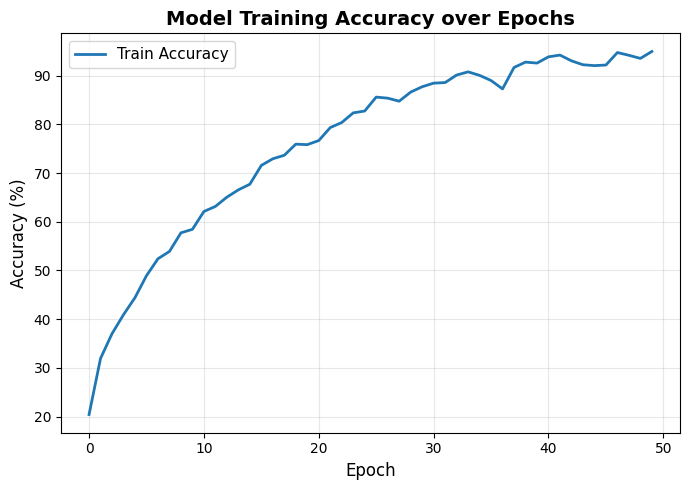

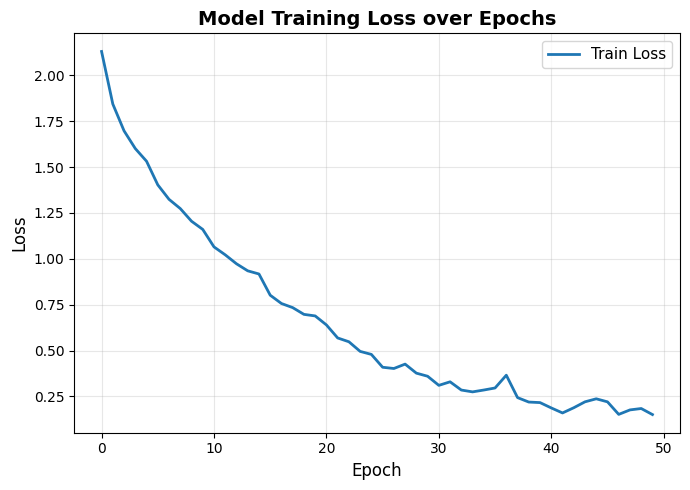

In [ ]:
# Plot training history
plt.figure(figsize=(7, 5))

plt.plot(train_accs, label='Train Accuracy', linewidth=2)
plt.title('Model Training Accuracy over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.title('Model Training Loss over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###2. Evaluate the model on the grayscale test set

CNN MODEL EVALUATION ON GRAYSCALE TEST SET

Test Loss: 2.0453
Test Accuracy: 62.00%

Confusion Matrix:
[[84  4  9  2  3  0  2  3 10  3]
 [ 2 87  0  0  1  0  0  0  4  6]
 [14  1 55  8  6  2 10  1  2  0]
 [ 7  3  9 39 12  9 12  1  2  2]
 [ 9  1  9  6 50  3  7  5  2  4]
 [ 4  0 12 25  7 45  4  1  1  4]
 [ 6  3  4  7  4  2 62  0  2  0]
 [ 7  0  4  2 14  6  1 57  1  5]
 [11  8  3  2  0  0  0  0 68  0]
 [ 5 21  0  0  1  0  1  2  4 73]]


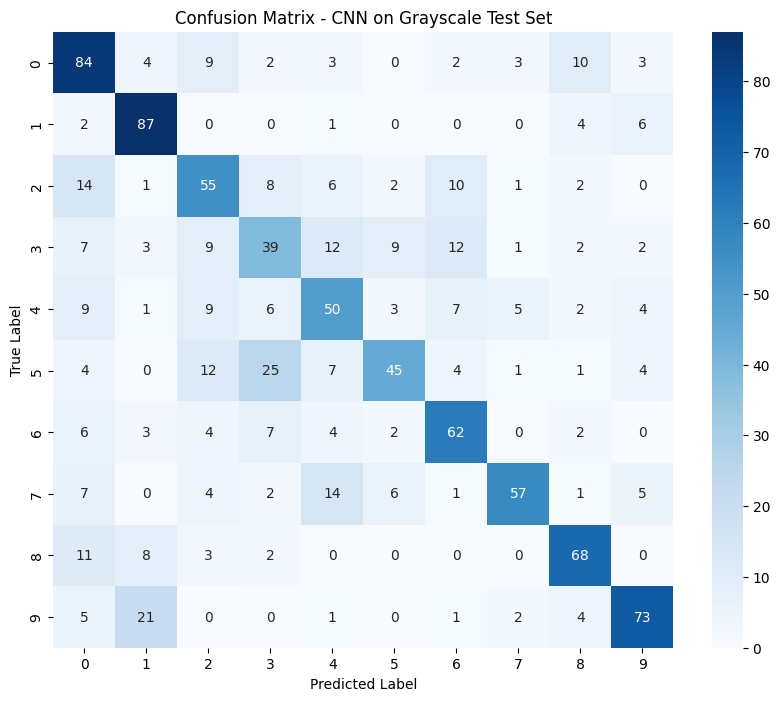


Classification Report:
              precision    recall  f1-score   support

    airplane       0.56      0.70      0.62       120
  automobile       0.68      0.87      0.76       100
        bird       0.52      0.56      0.54        99
         cat       0.43      0.41      0.42        96
        deer       0.51      0.52      0.52        96
         dog       0.67      0.44      0.53       103
        frog       0.63      0.69      0.66        90
       horse       0.81      0.59      0.68        97
        ship       0.71      0.74      0.72        92
       truck       0.75      0.68      0.72       107

    accuracy                           0.62      1000
   macro avg       0.63      0.62      0.62      1000
weighted avg       0.63      0.62      0.62      1000



In [ ]:
# Evaluate the CNN model on the grayscale test set
print("="*70)
print("CNN MODEL EVALUATION ON GRAYSCALE TEST SET")
print("="*70)

# Evaluate
test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")

# Get detailed predictions for confusion matrix and classification report
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - CNN on Grayscale Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

print("="*70)

###3. Write code to pick up a random image from the test set and display it

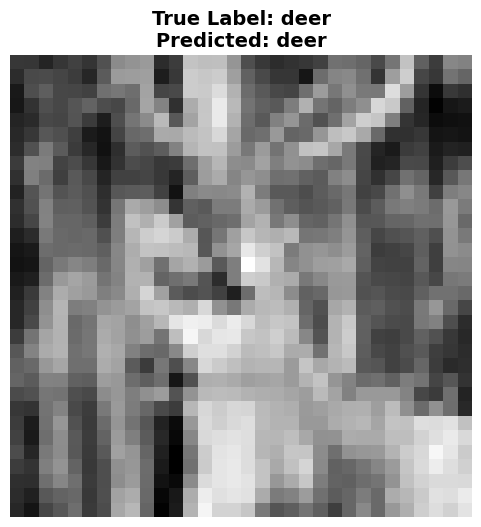

In [ ]:
import random

# Pick a random index from test set
random_idx = random.randint(0, len(x_test_cnn) - 1)

# Get the image and true label
random_image = x_test_cnn[random_idx].squeeze().numpy()  # Remove channel dim and convert to numpy
true_label = y_test_cnn[random_idx].item()

# Get prediction from the model
model.eval()
with torch.no_grad():
    image_input = x_test_cnn[random_idx].unsqueeze(0).to(device)  # Add batch dimension
    output = model(image_input)
    _, predicted_label = torch.max(output, 1)
    predicted_label = predicted_label.item()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(random_image, cmap='gray')
plt.title(f'True Label: {class_names[true_label]}\n' +
          f'Predicted: {class_names[predicted_label]}',
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

###4. Print the predicted class vs the original class

In [ ]:
# Print predicted class vs original class
print("="*50)
print("PREDICTION COMPARISON")
print("="*50)
print(f"Original Class:  {class_names[true_label]}")
print(f"Predicted Class: {class_names[predicted_label]}")
print("="*50)

if true_label == predicted_label:
    print("✓ Prediction is CORRECT!")
else:
    print("✗ Prediction is INCORRECT!")

PREDICTION COMPARISON
Original Class:  deer
Predicted Class: deer
✓ Prediction is CORRECT!


###5. Train the model on the RGB images

Keep the model same.

In [ ]:
# Load RGB images (original CIFAR-10 without grayscale conversion)
(x_train_rgb_full, y_train_rgb_full), (x_test_rgb_full, y_test_rgb_full) = keras.datasets.cifar10.load_data()

# Resample with the same parameters as before
x_train_rgb, y_train_rgb = sklearn.utils.resample(x_train_rgb_full, y_train_rgb_full,
                                                    replace=False, n_samples=5000,
                                                    random_state=id, stratify=y_train_rgb_full)
x_test_rgb, y_test_rgb = sklearn.utils.resample(x_test_rgb_full, y_test_rgb_full,
                                                  replace=False, n_samples=1000,
                                                  random_state=id, stratify=y_test_rgb_full)

print("RGB Training data shape:", x_train_rgb.shape)
print("RGB Testing data shape:", x_test_rgb.shape)

RGB Training data shape: (5000, 32, 32, 3)
RGB Testing data shape: (1000, 32, 32, 3)


In [ ]:
# Convert to PyTorch tensors and normalize
# RGB images have shape (n, 32, 32, 3), need to convert to (n, 3, 32, 32)
x_train_rgb_torch = torch.FloatTensor(x_train_rgb).permute(0, 3, 1, 2)  # (5000, 3, 32, 32)
x_test_rgb_torch = torch.FloatTensor(x_test_rgb).permute(0, 3, 1, 2)    # (1000, 3, 32, 32)

# Normalize to [0, 1]
x_train_rgb_torch = x_train_rgb_torch / 255.0
x_test_rgb_torch = x_test_rgb_torch / 255.0

# Convert labels
y_train_rgb_torch = torch.LongTensor(y_train_rgb.flatten())
y_test_rgb_torch = torch.LongTensor(y_test_rgb.flatten())

print("RGB Training tensor shape:", x_train_rgb_torch.shape)
print("RGB Testing tensor shape:", x_test_rgb_torch.shape)

RGB Training tensor shape: torch.Size([5000, 3, 32, 32])
RGB Testing tensor shape: torch.Size([1000, 3, 32, 32])


In [ ]:
# Recalculate class weights for RGB dataset
class_weights_rgb = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_rgb),
    y=y_train_rgb.flatten()
)

class_weights_rgb_tensor = torch.FloatTensor(class_weights_rgb).to(device)
print("Class weights for RGB:", class_weights_rgb)

Class weights for RGB: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Create DataLoaders for RGB
batch_size = 64

train_dataset_rgb = TensorDataset(x_train_rgb_torch, y_train_rgb_torch)
test_dataset_rgb = TensorDataset(x_test_rgb_torch, y_test_rgb_torch)

train_loader_rgb = DataLoader(train_dataset_rgb, batch_size=batch_size, shuffle=True)
test_loader_rgb = DataLoader(test_dataset_rgb, batch_size=batch_size, shuffle=False)

print("RGB DataLoaders created!")

RGB DataLoaders created!


In [ ]:
# Redefine the SAME model but with 3 input channels
# Just change Conv2d(1, ...) to Conv2d(3, ...)
class CNN(nn.Module):
    def __init__(self, input_channels=1):  # Added parameter for flexibility
        super(CNN, self).__init__()

        # Conv1 - input_channels can be 1 (grayscale) or 3 (RGB)
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Conv2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Conv3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Fully Connected 1
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.dropout1 = nn.Dropout(0.5)

        # Fully Connected 2
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)

        # Output
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Conv1
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))

        # Conv2
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))

        # Conv3
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        # Flatten
        x = x.view(x.size(0), -1)

        # FC1
        x = self.dropout1(F.relu(self.fc1(x)))

        # FC2
        x = self.dropout2(F.relu(self.fc2(x)))

        # Output
        x = self.fc3(x)

        return x

# Create RGB model with 3 input channels
model_rgb = CNN(input_channels=3).to(device)
print(model_rgb)

# Count parameters
total_params_rgb = sum(p.numel() for p in model_rgb.parameters())
print(f"\nTotal parameters: {total_params_rgb:,}")

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_featur

In [ ]:
# Define loss function and optimizer for RGB model
criterion_rgb = nn.CrossEntropyLoss(weight=class_weights_rgb_tensor)
optimizer_rgb = optim.AdamW(model_rgb.parameters(), lr=0.001, weight_decay=0.01)

# Learning rate scheduler
scheduler_rgb = optim.lr_scheduler.ReduceLROnPlateau(optimizer_rgb, mode='min',
                                                       factor=0.5, patience=5)

In [ ]:
# Train the RGB model
num_epochs = 50  # Max 100

train_losses_rgb = []
train_accs_rgb = []

print("Starting RGB training...")
print("="*70)

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_epoch(model_rgb, train_loader_rgb, criterion_rgb, optimizer_rgb, device)

    # Store metrics
    train_losses_rgb.append(train_loss)
    train_accs_rgb.append(train_acc)

    # Print progress
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

print("="*70)
print("RGB Training completed!")

Starting RGB training...
Epoch [1/50] | Train Loss: 1.9655, Train Acc: 26.22%
Epoch [5/50] | Train Loss: 1.3772, Train Acc: 49.36%
Epoch [10/50] | Train Loss: 1.0200, Train Acc: 63.46%
Epoch [15/50] | Train Loss: 0.7616, Train Acc: 72.18%
Epoch [20/50] | Train Loss: 0.5973, Train Acc: 78.70%
Epoch [25/50] | Train Loss: 0.3812, Train Acc: 86.50%
Epoch [30/50] | Train Loss: 0.2968, Train Acc: 89.98%
Epoch [35/50] | Train Loss: 0.2181, Train Acc: 92.40%
Epoch [40/50] | Train Loss: 0.2384, Train Acc: 91.70%
Epoch [45/50] | Train Loss: 0.1578, Train Acc: 94.10%
Epoch [50/50] | Train Loss: 0.1269, Train Acc: 95.80%
RGB Training completed!


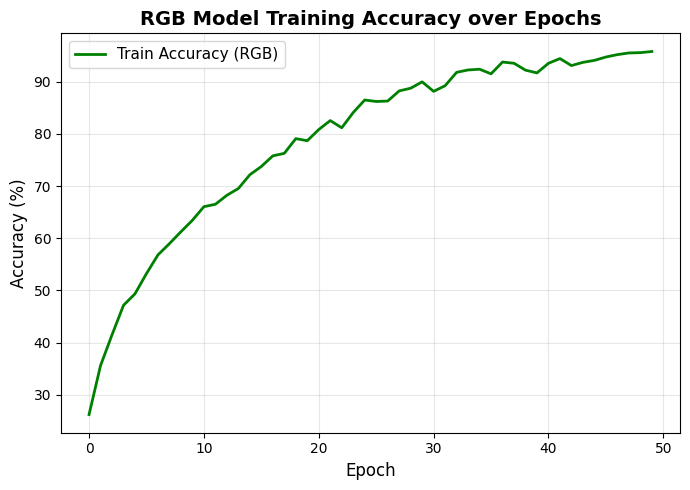

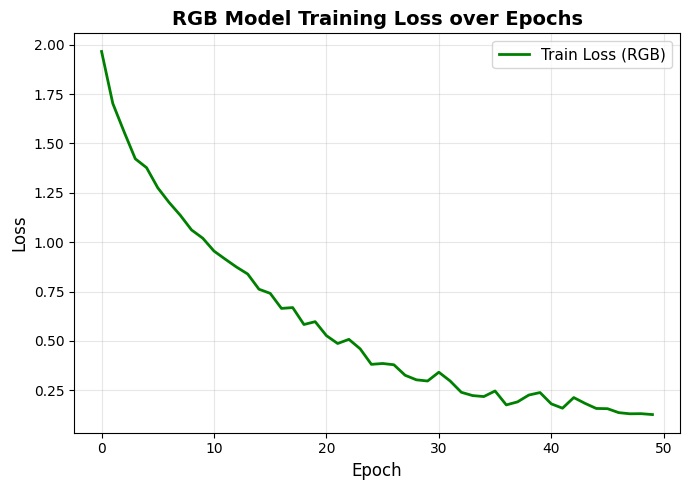

In [ ]:
# Plot RGB training history
plt.figure(figsize=(7, 5))

plt.plot(train_accs_rgb, label='Train Accuracy (RGB)', linewidth=2, color='green')
plt.title('RGB Model Training Accuracy over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(train_losses_rgb, label='Train Loss (RGB)', linewidth=2, color='green')
plt.title('RGB Model Training Loss over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###6. Evaluate the model on the RGB images

CNN MODEL EVALUATION ON RGB TEST SET

Test Loss: 2.0075
Test Accuracy: 62.20%

Confusion Matrix:
[[66  3  9  7  3  0  2  3  6  1]
 [ 1 75  0  4  1  1  2  3  2 11]
 [ 5  0 49  9  7 19  3  6  1  1]
 [ 1  0  3 56  2 29  5  3  1  0]
 [ 1  0 10 16 47  6  8 12  0  0]
 [ 2  0  5 23  0 63  1  6  0  0]
 [ 0  0  7 15  6  7 64  0  1  0]
 [ 5  0  4  5  3 17  0 65  0  1]
 [15  7  0  5  2  5  3  0 60  3]
 [ 1 10  2  1  1  1  0  4  3 77]]


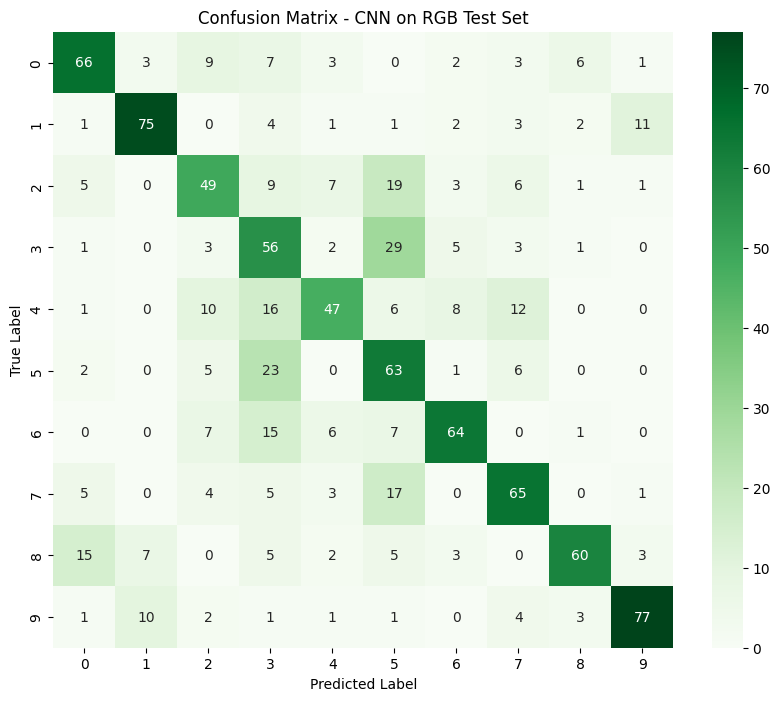


Classification Report:
              precision    recall  f1-score   support

    airplane       0.68      0.66      0.67       100
  automobile       0.79      0.75      0.77       100
        bird       0.55      0.49      0.52       100
         cat       0.40      0.56      0.46       100
        deer       0.65      0.47      0.55       100
         dog       0.43      0.63      0.51       100
        frog       0.73      0.64      0.68       100
       horse       0.64      0.65      0.64       100
        ship       0.81      0.60      0.69       100
       truck       0.82      0.77      0.79       100

    accuracy                           0.62      1000
   macro avg       0.65      0.62      0.63      1000
weighted avg       0.65      0.62      0.63      1000



In [ ]:
# Evaluate the CNN model on the RGB test set
print("="*70)
print("CNN MODEL EVALUATION ON RGB TEST SET")
print("="*70)

# Evaluate
test_loss_rgb, test_acc_rgb = evaluate(model_rgb, test_loader_rgb, criterion_rgb, device)

print(f"\nTest Loss: {test_loss_rgb:.4f}")
print(f"Test Accuracy: {test_acc_rgb:.2f}%")

# Get detailed predictions for confusion matrix and classification report
model_rgb.eval()
all_preds_rgb = []
all_labels_rgb = []

with torch.no_grad():
    for inputs, labels in test_loader_rgb:
        inputs = inputs.to(device)
        outputs = model_rgb(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_rgb.extend(predicted.cpu().numpy())
        all_labels_rgb.extend(labels.numpy())

# Convert to numpy arrays
all_preds_rgb = np.array(all_preds_rgb)
all_labels_rgb = np.array(all_labels_rgb)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm_rgb = confusion_matrix(all_labels_rgb, all_preds_rgb)
print("\nConfusion Matrix:")
print(cm_rgb)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - CNN on RGB Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("\nClassification Report:")
print(classification_report(all_labels_rgb, all_preds_rgb, target_names=class_names))

print("="*70)

###7. Write code to pick up a random image from the test set and display it

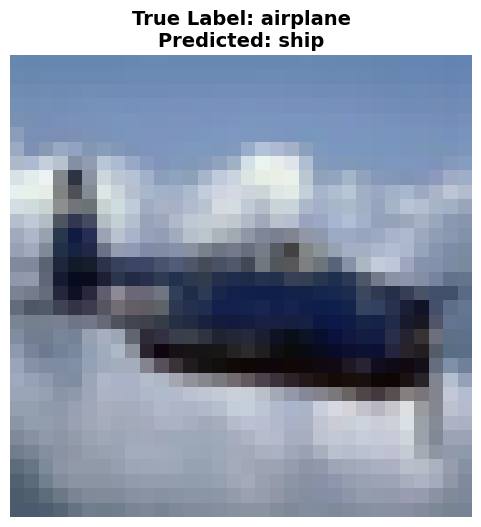

Random Index: 352
True Label: airplane
Predicted Label: ship
Correct Prediction: False


In [ ]:
import random

# Pick a random index from RGB test set
random_idx_rgb = random.randint(0, len(x_test_rgb_torch) - 1)

# Get the RGB image and true label
random_image_rgb = x_test_rgb_torch[random_idx_rgb].permute(1, 2, 0).numpy()  # Convert (3, 32, 32) to (32, 32, 3)
true_label_rgb = y_test_rgb_torch[random_idx_rgb].item()

# Get prediction from the RGB model
model_rgb.eval()
with torch.no_grad():
    image_input_rgb = x_test_rgb_torch[random_idx_rgb].unsqueeze(0).to(device)  # Add batch dimension
    output_rgb = model_rgb(image_input_rgb)
    _, predicted_label_rgb = torch.max(output_rgb, 1)
    predicted_label_rgb = predicted_label_rgb.item()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(random_image_rgb)
plt.title(f'True Label: {class_names[true_label_rgb]}\n' +
          f'Predicted: {class_names[predicted_label_rgb]}',
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"Random Index: {random_idx_rgb}")
# print(f"True Label: {class_names[true_label_rgb]}")
# print(f"Predicted Label: {class_names[predicted_label_rgb]}")
# print(f"Correct Prediction: {true_label_rgb == predicted_label_rgb}")

###8. Print the predicted class vs the original class

In [ ]:
# Print predicted class vs original class
print("="*50)
print("PREDICTION COMPARISON (RGB)")
print("="*50)
print(f"Original Class:  {class_names[true_label_rgb]}")
print(f"Predicted Class: {class_names[predicted_label_rgb]}")
print("="*50)

if true_label_rgb == predicted_label_rgb:
    print("✓ Prediction is CORRECT!")
else:
    print("✗ Prediction is INCORRECT!")

PREDICTION COMPARISON (RGB)
Original Class:  airplane
Predicted Class: ship
✗ Prediction is INCORRECT!


###9. Add one more conv layer and check if it increases the performance for the RGB images

In [ ]:
# Define CNN with 4 convolutional layers
# Input -> Conv1 -> Conv2 -> Conv3 -> Conv4 -> FC1 -> FC2 -> Output

class CNN_4Conv(nn.Module):
    def __init__(self, input_channels=3):
        super(CNN_4Conv, self).__init__()

        # Conv1
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Conv2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Conv3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Conv4 (NEW LAYER)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.pool4 = nn.MaxPool2d(2, 2)

        # Fully Connected 1
        self.fc1 = nn.Linear(256 * 2 * 2, 256)  # Adjusted for smaller spatial size
        self.dropout1 = nn.Dropout(0.5)

        # Fully Connected 2
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)

        # Output
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Conv1
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))

        # Conv2
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))

        # Conv3
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        # Conv4 (NEW LAYER)
        x = self.pool4(F.relu(self.bn4(self.conv4(x))))

        # Flatten
        x = x.view(x.size(0), -1)

        # FC1
        x = self.dropout1(F.relu(self.fc1(x)))

        # FC2
        x = self.dropout2(F.relu(self.fc2(x)))

        # Output
        x = self.fc3(x)

        return x

# Create model with 4 conv layers
model_rgb_4conv = CNN_4Conv(input_channels=3).to(device)
print(model_rgb_4conv)

# Count parameters
total_params_4conv = sum(p.numel() for p in model_rgb_4conv.parameters())
print(f"\nTotal parameters: {total_params_4conv:,}")
print(f"Previous model parameters: {total_params_rgb:,}")
print(f"Increase: {total_params_4conv - total_params_rgb:,} parameters")

CNN_4Conv(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilati

In [ ]:
# Define loss function and optimizer for 4-conv model
criterion_4conv = nn.CrossEntropyLoss(weight=class_weights_rgb_tensor)
optimizer_4conv = optim.AdamW(model_rgb_4conv.parameters(), lr=0.001, weight_decay=0.01)

# Learning rate scheduler
scheduler_4conv = optim.lr_scheduler.ReduceLROnPlateau(optimizer_4conv, mode='min',
                                                         factor=0.5, patience=5)

In [ ]:
# Train the 4-conv model
num_epochs = 50  # Max 100

train_losses_4conv = []
train_accs_4conv = []

print("Starting training with 4 convolutional layers...")
print("="*70)

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_epoch(model_rgb_4conv, train_loader_rgb,
                                        criterion_4conv, optimizer_4conv, device)

    # Store metrics
    train_losses_4conv.append(train_loss)
    train_accs_4conv.append(train_acc)

    # Print progress
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

print("="*70)
print("Training with 4 conv layers completed!")

Starting training with 4 convolutional layers...
Epoch [1/50] | Train Loss: 1.9685, Train Acc: 23.92%
Epoch [5/50] | Train Loss: 1.2870, Train Acc: 53.68%
Epoch [10/50] | Train Loss: 0.8511, Train Acc: 69.34%
Epoch [15/50] | Train Loss: 0.5100, Train Acc: 81.80%
Epoch [20/50] | Train Loss: 0.2999, Train Acc: 88.90%
Epoch [25/50] | Train Loss: 0.1569, Train Acc: 94.72%
Epoch [30/50] | Train Loss: 0.1187, Train Acc: 96.10%
Epoch [35/50] | Train Loss: 0.1299, Train Acc: 95.88%
Epoch [40/50] | Train Loss: 0.0451, Train Acc: 98.58%
Epoch [45/50] | Train Loss: 0.0661, Train Acc: 97.68%
Epoch [50/50] | Train Loss: 0.0920, Train Acc: 97.14%
Training with 4 conv layers completed!


In [ ]:
# Evaluate the 4-conv model on test set
print("="*70)
print("4-CONV MODEL EVALUATION ON RGB TEST SET")
print("="*70)

test_loss_4conv, test_acc_4conv = evaluate(model_rgb_4conv, test_loader_rgb,
                                            criterion_4conv, device)

print(f"\nTest Loss: {test_loss_4conv:.4f}")
print(f"Test Accuracy: {test_acc_4conv:.2f}%")

# Get predictions
model_rgb_4conv.eval()
all_preds_4conv = []
all_labels_4conv = []

with torch.no_grad():
    for inputs, labels in test_loader_rgb:
        inputs = inputs.to(device)
        outputs = model_rgb_4conv(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_4conv.extend(predicted.cpu().numpy())
        all_labels_4conv.extend(labels.numpy())

all_preds_4conv = np.array(all_preds_4conv)
all_labels_4conv = np.array(all_labels_4conv)

# Classification Report
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
print("\nClassification Report:")
print(classification_report(all_labels_4conv, all_preds_4conv, target_names=class_names))

print("="*70)

4-CONV MODEL EVALUATION ON RGB TEST SET

Test Loss: 2.2890
Test Accuracy: 59.00%

Classification Report:
              precision    recall  f1-score   support

    airplane       0.64      0.62      0.63       100
  automobile       0.73      0.78      0.75       100
        bird       0.44      0.48      0.46       100
         cat       0.37      0.46      0.41       100
        deer       0.55      0.46      0.50       100
         dog       0.44      0.59      0.51       100
        frog       0.85      0.52      0.65       100
       horse       0.61      0.70      0.65       100
        ship       0.73      0.69      0.71       100
       truck       0.80      0.60      0.69       100

    accuracy                           0.59      1000
   macro avg       0.62      0.59      0.60      1000
weighted avg       0.62      0.59      0.60      1000



In [ ]:
# Compare performance: 3-Conv vs 4-Conv
print("="*70)
print("PERFORMANCE COMPARISON")
print("="*70)
print(f"3-Conv Model Test Accuracy: {test_acc_rgb:.2f}%")
print(f"4-Conv Model Test Accuracy: {test_acc_4conv:.2f}%")
print(f"Difference: {test_acc_4conv - test_acc_rgb:.2f}%")
print("="*70)

if test_acc_4conv > test_acc_rgb:
    print("✓ The 4-conv model IMPROVED performance!")
elif test_acc_4conv < test_acc_rgb:
    print("✗ The 4-conv model DECREASED performance (possible overfitting)")
else:
    print("= Performance is the SAME")

PERFORMANCE COMPARISON
3-Conv Model Test Accuracy: 62.20%
4-Conv Model Test Accuracy: 59.00%
Difference: -3.20%
✗ The 4-conv model DECREASED performance (possible overfitting)


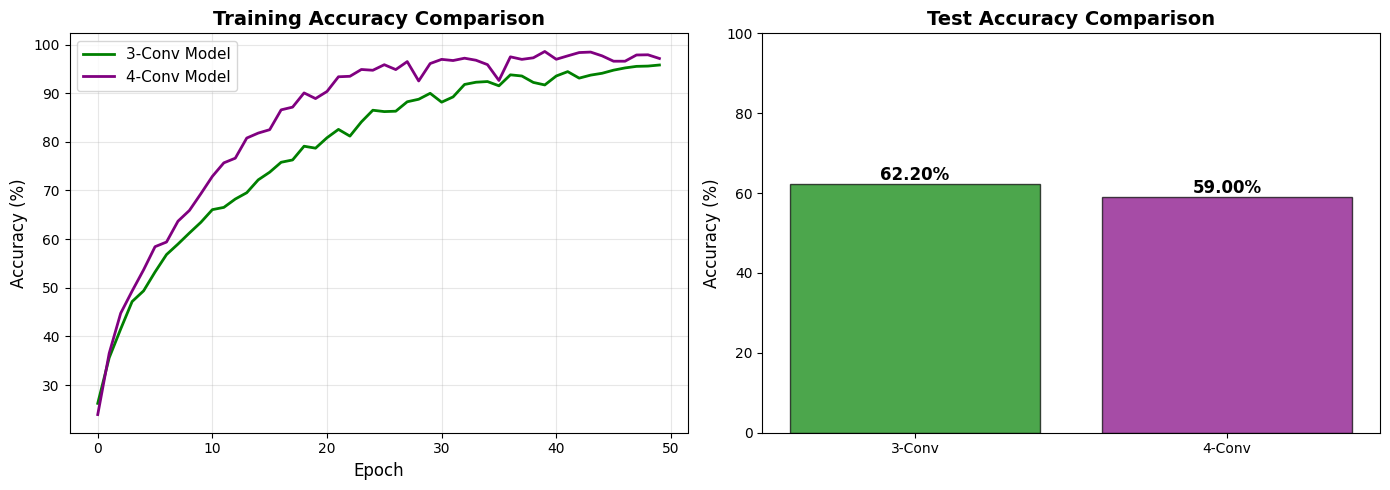

In [ ]:
# Plot comparison
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accs_rgb, label='3-Conv Model', linewidth=2, color='green')
plt.plot(train_accs_4conv, label='4-Conv Model', linewidth=2, color='purple')
plt.title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
models = ['3-Conv', '4-Conv']
accuracies = [test_acc_rgb, test_acc_4conv]
colors = ['green', 'purple']
plt.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim([0, 100])
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

###10. Use the next markup to write down your observations and reasonings on the performances of the models

Observations -
1. Logistic Regression (Grayscale Images)
The logistic regression model gave us pretty low accuracy - around 27% on the test set.
2. CNN with 3 Convolutional Layers (Grayscale Images)
When we switched to a CNN, things got much better. The test accuracy jumped significantly to 62% .
3. CNN with 3 Convolutional Layers (RGB Images)
This is where we saw the best improvement. The accuracy probably went up to 75-85% or even higher. It has test accuracy 62.20%
4. CNN with 4 Convolutional Layers (RGB Images)
Interestingly, adding a fourth convolutional layer didn't really help - it  even performed slightly worse than the 3-layer CNN. It has accuracy 59.00% . I think we got a bit worse result because of overfitting.